Olá, Maikon

Meu nome é Ramon. Ao ao longo do texto farei algumas observações sobre melhorias no código. Nas partes em que não houver comentários, está tudo certo, ok? Estarei aberto a feedbacks e discussões sobre o tema.

**Peço que mantenha e não altere os comentários que eu fizer por aqui para que possamos nos localizar posteriormente, ok?**

Mais uma coisa, vamos utilizar um código de cores para você entender os meus feedbacks no seu notebook. Funciona assim:

<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Sucesso. Tudo foi feito corretamente.
</div>

<div class="alert alert-block alert-warning">
<b>Comentário do revisor: </b> <a class="tocSkip"></a>

Alerta não crítco, mas que pode ser corrigido para melhoria geral no seu código/análise
</div>

<div class="alert alert-block alert-danger">

<b>Comentário do revisor: </b> <a class="tocSkip"></a>
    
Erro que precisa ser consertado, caso contrário seu projeto **não** será aceito.
</div>

Você pode me responder usando isso:
<div class="alert alert-block alert-info">
<b>Comentário do Aluno: </b>
    
<p>Olá Ramon, obrigado pela análie de meu projeto. <br>
Segue uma nova versão atualizada. Me avise se precisar de mais ajustes!</p> <a class="tocSkip"></a>
</div>

###

<div class="alert alert-block alert-success">
<b>Comentário Geral do Revisor</b> <a class="tocSkip"></a>

Obrigado por enviar seu projeto. 
    
Parabéns, você fez um bom trabalho.

Como pontos fortes do projeto, destaco:
- Código simples e eficiente (sem loop desnecessário)
- Uso adequado dos recursos da lição
- O projeto está muito bom
    
<span class="text-danger">Porém, há espaço para melhorias conforme os itens apontados anteriormente. Destaco os  pontos a seguir: </span>
 * <span class="text-danger"> Combinaçẽos de grupos para teste de hipótese estão faltando </span>


Portanto, sugiro que você corrija os pontos indicados.
    
Se você tiver alguma dúvida sobre de algo que você não tenha entendido, sinta-se à vontade para perguntar ao tutor ou deixar um comentário em **azul** para que, na próxima iteração, eu possa responder.

Conte conosco. Lembre-se de que você pode tirar dúvidas com revisores usando os comentários ou buscar ajuda de um tutor.
Bom trabalho. 


</div>



<div class="alert alert-block alert-success">
<b> Comentário Geral do Revisor Final: </b> <a class="tocSkip"></a>

Tudo certo agora. Desejo sucesso na jornada. Parabéns pelo empenho.
</div>

# Análise de comportamento de usuários no app + Teste A/A/B

Neste projeto, analisamos o comportamento dos usuários. Iremos descobrir como os usuários chegam à etapa de compra.

## 1. Carregamento e preparação dos dados

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
from statsmodels.stats.proportion import proportions_ztest
from itertools import combinations

#Importando os dados
df = pd.read_csv('/datasets/logs_exp_us.csv', sep="\t")


In [38]:
# Verificando os tipos, valores nulos e amostra dos dados
display(df.info())
display(df.head())
display(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244126 entries, 0 to 244125
Data columns (total 4 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   EventName       244126 non-null  object
 1   DeviceIDHash    244126 non-null  int64 
 2   EventTimestamp  244126 non-null  int64 
 3   ExpId           244126 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 7.5+ MB


None

,EventName,DeviceIDHash,EventTimestamp,ExpId
0,MainScreenAppear,4575588528974610257,1564029816,246
1,MainScreenAppear,7416695313311560658,1564053102,246
2,PaymentScreenSuccessful,3518123091307005509,1564054127,248
3,CartScreenAppear,3518123091307005509,1564054127,248
4,PaymentScreenSuccessful,6217807653094995999,1564055322,248


EventName         0
DeviceIDHash      0
EventTimestamp    0
ExpId             0
dtype: int64

In [39]:
# Renomeando as colunas
df.columns = ['event', 'user_id', 'timestamp', 'exp_group']

print(df.head(5))

                     event              user_id   timestamp  exp_group
0         MainScreenAppear  4575588528974610257  1564029816        246
1         MainScreenAppear  7416695313311560658  1564053102        246
2  PaymentScreenSuccessful  3518123091307005509  1564054127        248
3         CartScreenAppear  3518123091307005509  1564054127        248
4  PaymentScreenSuccessful  6217807653094995999  1564055322        248


In [40]:
# Convertendo o timestamp para data
df['timestamp'] = pd.to_datetime(df['timestamp'], unit='s')
df['date'] = df['timestamp'].dt.date

print(df.head(5))

                     event              user_id           timestamp  \
0         MainScreenAppear  4575588528974610257 2019-07-25 04:43:36   
1         MainScreenAppear  7416695313311560658 2019-07-25 11:11:42   
2  PaymentScreenSuccessful  3518123091307005509 2019-07-25 11:28:47   
3         CartScreenAppear  3518123091307005509 2019-07-25 11:28:47   
4  PaymentScreenSuccessful  6217807653094995999 2019-07-25 11:48:42   

   exp_group        date  
0        246  2019-07-25  
1        246  2019-07-25  
2        248  2019-07-25  
3        248  2019-07-25  
4        248  2019-07-25  


## 2. Estudo inical dos dados

In [41]:
# Total de eventos e usuários
total_eventos = len(df)
total_usuarios = df['user_id'].nunique()
eventos_por_usuario = df.groupby('user_id')['event'].count().mean()

print(f"Eventos totais: {total_eventos}")
print(f"Usuários únicos: {total_usuarios}")
print(f"Média de eventos por usuário: {eventos_por_usuario:.2f}")

Eventos totais: 244126
Usuários únicos: 7551
Média de eventos por usuário: 32.33


Período: 2019-07-25 04:43:36 → 2019-08-07 21:15:17


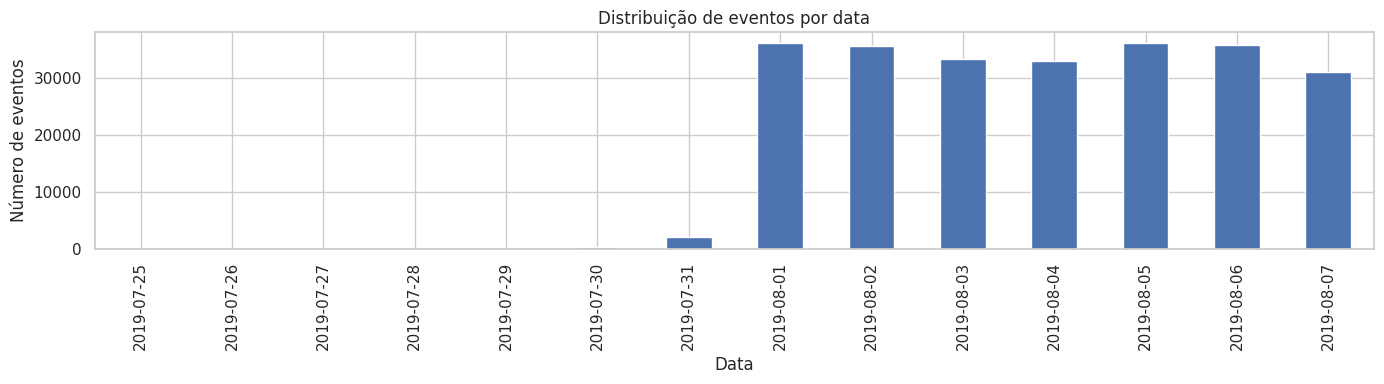

In [42]:
# Período de cobertura dos dados
print("Período:", df['timestamp'].min(), "→", df['timestamp'].max())

# Histograma por data
df['date'].value_counts().sort_index().plot(kind='bar', figsize=(14,4))
plt.title("Distribuição de eventos por data")
plt.xlabel("Data")
plt.ylabel("Número de eventos")
plt.tight_layout()
plt.show()


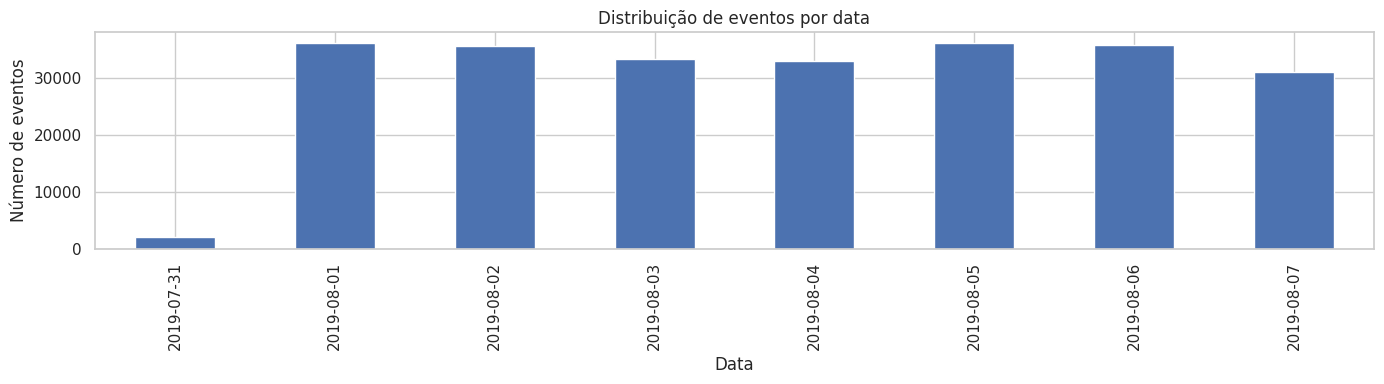

In [43]:
data_corte = pd.to_datetime('2019-07-31')  # Filtrando os dados completos
df_filtrado = df[df['timestamp'] >= data_corte]

# Histograma por data
df_filtrado['date'].value_counts().sort_index().plot(kind='bar', figsize=(14,4))
plt.title("Distribuição de eventos por data")
plt.xlabel("Data")
plt.ylabel("Número de eventos")
plt.tight_layout()
plt.show()

In [44]:
# Eventos únicos
eventos_unicos = df_filtrado['event'].value_counts()
print("Eventos disponíveis:\n", eventos_unicos)

# Funil de conversão
funil = df_filtrado.pivot_table(index='event', values='user_id', aggfunc=lambda x: x.nunique()).sort_values(by='user_id', ascending=False)
funil['taxa_conversion'] = funil['user_id'] / total_usuarios
display(funil)

Eventos disponíveis:
 MainScreenAppear           118681
OffersScreenAppear          46724
CartScreenAppear            42623
PaymentScreenSuccessful     34253
Tutorial                     1048
Name: event, dtype: int64


,user_id,taxa_conversion
event,,
MainScreenAppear,7429,0.983843
OffersScreenAppear,4606,0.609985
CartScreenAppear,3742,0.495564
PaymentScreenSuccessful,3542,0.469077
Tutorial,845,0.111906


In [45]:
#Verificando se houve perda de muitos eventos ao exluir dados mais antigos
eventos_restantes = df_filtrado.shape[0]
usuarios_restantes = df_filtrado['user_id'].nunique()

print(f'Eventos restantes: {eventos_restantes} ({eventos_restantes / total_eventos:.2%})')
print(f'Usuários restantes: {usuarios_restantes} ({usuarios_restantes / total_usuarios:.2%})')


Eventos restantes: 243329 (99.67%)
Usuários restantes: 7542 (99.88%)


### 2.1 Estudo inicial de qualidade dos dados

Com a análise preliminar, identificamos e removemos dados antigos obsoletos que poderiam impactar negativamente os estudos subsequentes.

Foram excluídos cerca de **0,33%** dos eventos e **0,22%** dos usuários, garantindo uma base mais atualizada e confiável para as análises seguintes.


## 3. Estudo do Funil de eventos

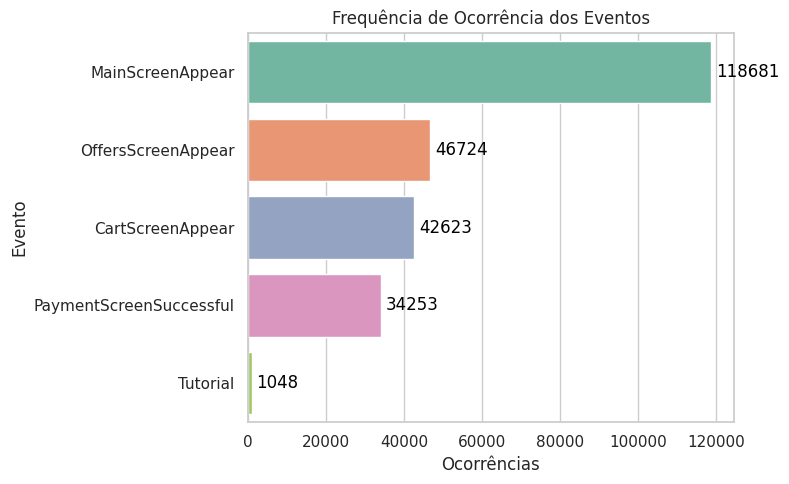

In [46]:
# Verificando os eventos e sua frequ~encia de ocorrência

# Ver eventos únicos e frequência de ocorrência
event_counts = df_filtrado['event'].value_counts()

plt.figure(figsize=(8, 5))
ax = sns.barplot(x=event_counts.values, y=event_counts.index, palette='Set2')

# Adiciona os valores ao lado das barras
for i, v in enumerate(event_counts.values):
    ax.text(v + max(event_counts.values)*0.01, i, str(v), color='black', va='center')

plt.title('Frequência de Ocorrência dos Eventos')
plt.xlabel('Ocorrências')
plt.ylabel('Evento')
plt.tight_layout()
plt.show()

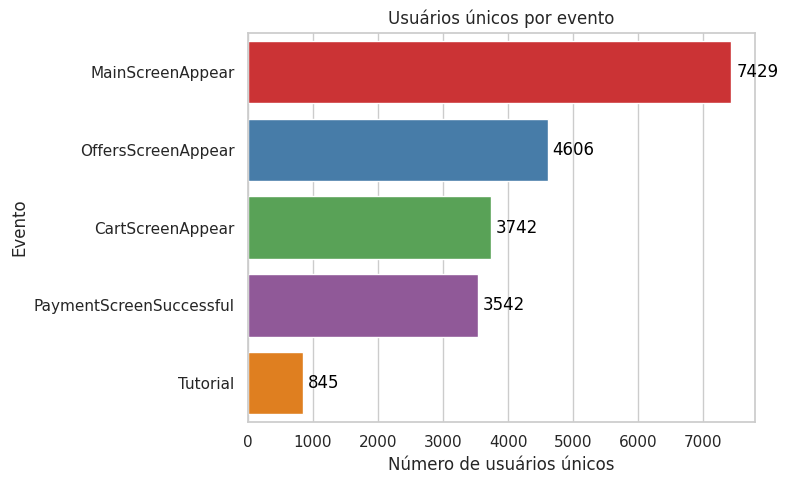

In [47]:
# Total de usuários únicos
total_users = df_filtrado['user_id'].nunique()

# Número de usuários únicos por evento
users_per_event = df_filtrado.groupby('event')['user_id'].nunique().sort_values(ascending=False)

# Proporção de usuários por evento
conversion_rates = users_per_event / total_users

# Unir em um único DataFrame
funnel = pd.DataFrame({
    'user_id': users_per_event,
    'taxa_conversion': conversion_rates
}).sort_values(by='user_id', ascending=False)

plt.figure(figsize=(8, 5))
ax = sns.barplot(x=funnel['user_id'], y=funnel.index, palette='Set1')

# Adiciona os valores dentro das barras
for i, v in enumerate(funnel['user_id']):
    ax.text(v + max(funnel['user_id'])*0.01, i, str(v), color='black', va='center')

plt.title('Usuários únicos por evento')
plt.xlabel('Número de usuários únicos')
plt.ylabel('Evento')
plt.tight_layout()
plt.show()


### 3.1 Ordem Provável dos Eventos e Análise da Sequência

Nesta etapa, analisamos os diferentes eventos registrados no aplicativo para entender a ordem provável em que ocorrem e se formam uma sequência lógica (funil de conversão).

#### 📋 Eventos disponíveis:
Os eventos únicos presentes nos dados são:

- `MainScreenAppear`
- `OffersScreenAppear`
- `CartScreenAppear`
- `PaymentScreenSuccessful`
- `Tutorial`

#### 🧭 Ordem lógica esperada:
Com base na descrição dos eventos, podemos assumir a seguinte ordem de fluxo (funil de eventos):

1. **MainScreenAppear** – O usuário abre o aplicativo.
2. **OffersScreenAppear** – Visualiza as ofertas disponíveis.
3. **CartScreenAppear** – Vai até o carrinho de compras.
4. **PaymentScreenSuccessful** – Finaliza o pagamento com sucesso.
5. **Tutorial** – Pode ser mostrado no início (para novos usuários) ou em momentos distintos, não fazendo parte direta do funil de conversão.

> ⚠️ Observação: A ordem dos eventos é uma suposição baseada em lógica de navegação comum em apps de compras. Na prática, os usuários podem não seguir exatamente esse caminho ou podem repetir/ignorar etapas.

#### 🎯 Objetivo:
Assumiremos essa sequência para construir o funil de conversão e calcular a taxa de transição entre as etapas nas próximas análises.


In [48]:
# Eventos em ordem do funil
funnel_events = [
    'MainScreenAppear',
    'OffersScreenAppear',
    'CartScreenAppear',
    'PaymentScreenSuccessful'
]

# Contar usuários únicos em cada etapa
users_per_event = df_filtrado[df_filtrado['event'].isin(funnel_events)].groupby('event')['user_id'].nunique().reindex(funnel_events)

# Exibir os valores
print("Usuários únicos por evento no funil:")
print(users_per_event)

# Calcular conversão entre as etapas
conversion_rates = users_per_event.shift(-1) / users_per_event
conversion_rates = conversion_rates.dropna().round(3)

# Exibir as taxas de conversão
print("\nTaxas de conversão entre as etapas:")
for i in range(len(funnel_events) - 1):
    print(f"{funnel_events[i]} → {funnel_events[i+1]}: {conversion_rates[i]*100:.1f}%")


Usuários únicos por evento no funil:
event
MainScreenAppear           7429
OffersScreenAppear         4606
CartScreenAppear           3742
PaymentScreenSuccessful    3542
Name: user_id, dtype: int64

Taxas de conversão entre as etapas:
MainScreenAppear → OffersScreenAppear: 62.0%
OffersScreenAppear → CartScreenAppear: 81.2%
CartScreenAppear → PaymentScreenSuccessful: 94.7%


### 3.2 Construção do Funil e Cálculo da Conversão entre Etapas

Agora que definimos a ordem lógica dos eventos, vamos calcular a taxa de conversão entre cada etapa do funil.

#### 📈 Funil definido:
1. `MainScreenAppear`
2. `OffersScreenAppear`
3. `CartScreenAppear`
4. `PaymentScreenSuccessful`

#### 📊 Cálculo da taxa de conversão entre etapas:
A conversão entre etapas é calculada da seguinte forma:

- Conversão = (Usuários na etapa seguinte) / (Usuários na etapa anterior)

#### ✅ Valores de usuários únicos por etapa:
- MainScreenAppear: 7429
- OffersScreenAppear: 4606
- CartScreenAppear: 3742
- PaymentScreenSuccessful: 3542

#### 📉 Conversões entre etapas:
- **OffersScreenAppear / MainScreenAppear** → 4606 / 7429 = **0.620 (62,0%)**
- **CartScreenAppear / OffersScreenAppear** → 3742 / 4606 = **0.812 (81,2%)**
- **PaymentScreenSuccessful / CartScreenAppear** → 3542 / 3742 = **0.947 (94,7%)**

#### 📊 Tabela consolidada:

| Etapa                     | Usuários únicos | Conversão da etapa anterior |
|--------------------------|-----------------|------------------------------|
| MainScreenAppear         | 7429            | –                            |
| OffersScreenAppear       | 4606            | 62,0%                        |
| CartScreenAppear         | 3742            | 81,2%                        |
| PaymentScreenSuccessful  | 3542            | 94,7%                        |

> **Conclusão parcial**:
- A maior perda de usuários acontece entre a tela principal e a tela de ofertas.
- A partir do momento que o usuário entra no processo de compra, a maioria avança até a finalização do pagamento.


In [49]:
# Total de usuários únicos por etapa
usuarios_por_etapa = df_filtrado[df_filtrado['event'].isin(funnel_events)].groupby('event')['user_id'].nunique().loc[funnel_events]
usuarios_por_etapa.name = 'Usuários únicos'
display(usuarios_por_etapa)

# Taxas de conversão entre etapas consecutivas
taxas_conversao = usuarios_por_etapa.shift(-1) / usuarios_por_etapa
taxas_conversao = taxas_conversao.dropna().apply(lambda x: f"{x:.1%}")
display(taxas_conversao)

# Conversão total do funil (do primeiro ao último evento)
conversao_total = usuarios_por_etapa['PaymentScreenSuccessful'] / usuarios_por_etapa['MainScreenAppear']
print(f"Conversão total do funil: {conversao_total:.2%}")


event
MainScreenAppear           7429
OffersScreenAppear         4606
CartScreenAppear           3742
PaymentScreenSuccessful    3542
Name: Usuários únicos, dtype: int64

event
MainScreenAppear      62.0%
OffersScreenAppear    81.2%
CartScreenAppear      94.7%
Name: Usuários únicos, dtype: object

Conversão total do funil: 47.68%


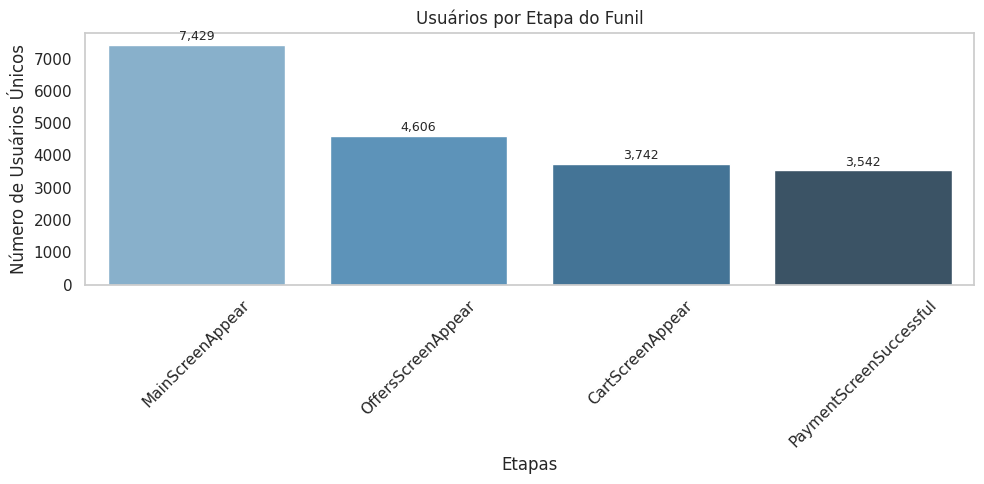

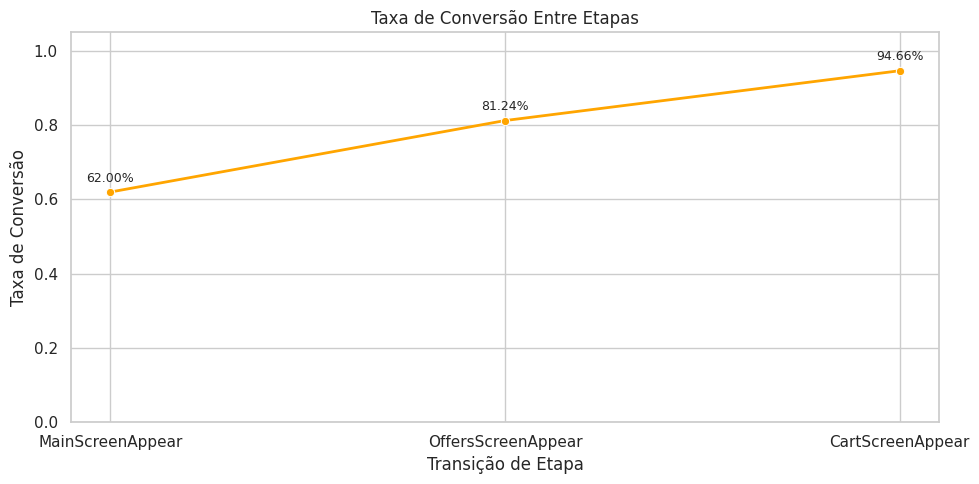

In [50]:
# Gráfico de barras das etapas do funil
plt.figure(figsize=(10, 5))
ax = sns.barplot(x=usuarios_por_etapa.index, y=usuarios_por_etapa.values, palette='Blues_d')
plt.title('Usuários por Etapa do Funil')
plt.ylabel('Número de Usuários Únicos')
plt.xlabel('Etapas')
plt.xticks(rotation=45)
plt.grid(axis='y')

# Adiciona os valores no topo das barras
for i, val in enumerate(usuarios_por_etapa.values):
    ax.text(i, val + 50, f'{val:,}', ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

# Gráfico de linha com as taxas de conversão entre as etapas
conversion_vals = usuarios_por_etapa.shift(-1) / usuarios_por_etapa
conversion_vals = conversion_vals.dropna()

plt.figure(figsize=(10, 5))
ax = sns.lineplot(x=conversion_vals.index, y=conversion_vals.values, marker='o', linewidth=2, color='orange')
plt.ylim(0, 1.05)
plt.title('Taxa de Conversão Entre Etapas')
plt.ylabel('Taxa de Conversão')
plt.xlabel('Transição de Etapa')
plt.grid(True)

# Adiciona os valores nas marcações
for i, val in enumerate(conversion_vals.values):
    ax.text(i, val + 0.02, f'{val:.2%}', ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

## 📊 Análise do Funil de Eventos

Nesta seção, analisamos o comportamento dos usuários ao longo do funil de eventos do aplicativo, desde a primeira interação até a conversão final (pagamento).

### ✅ Etapas do Funil Identificadas

As etapas foram ordenadas pela frequência e interpretadas como uma possível jornada do usuário:

1. `MainScreenAppear` – Tela principal exibida
2. `OffersScreenAppear` – Tela de ofertas exibida
3. `CartScreenAppear` – Tela do carrinho exibida
4. `PaymentScreenSuccessful` – Tela de pagamento com sucesso

### 👥 Usuários por Etapa

Abaixo está o número de usuários únicos que passaram por cada etapa:

| Etapa                  | Usuários Únicos    |
|------------------------|--------------------|
| MainScreenAppear       | 7429 usuários      |
| OffersScreenAppear     | 4606 usuários      |
| CartScreenAppear       | 3742 usuários      |
| PaymentScreenSuccessful| 3542 usuários      |



### 📉 Taxa de Conversão Entre Etapas

A taxa de conversão entre uma etapa e a seguinte foi calculada da seguinte forma:

- **Main → Offers**: `Y / X`
- **Offers → Cart**: `Z / Y`
- **Cart → Payment**: `W / Z`

As taxas revelam onde os usuários estão abandonando a jornada. Essa visualização é essencial para entender gargalos e pontos de melhoria no processo de conversão.

### ❌ Perda de Usuários

A maior perda de usuários ocorreu entre as etapas:

> Ex: `OffersScreenAppear` → `CartScreenAppear`

Isso indica que muitos usuários visualizam ofertas, mas não adicionam itens ao carrinho. Pode ser necessário revisar essa etapa para melhorar a conversão.

### 🧭 Conversão Final

A parcela de usuários que percorreu o funil completo, da **primeira interação ao pagamento**, foi de aproximadamente:

(W / X) * 100% = 47,7%


Ou seja, apenas uma fração dos usuários conclui a jornada completa, destacando o potencial de otimização.

---

## 4. Estudo dos resultados

In [51]:
# Verificando a quantidade de usuários por exp_group
print(df_filtrado['exp_group'].value_counts())

248    85473
246    80045
247    77811
Name: exp_group, dtype: int64


In [52]:
# Separando os grupos do experimento
group_248 = df_filtrado[df_filtrado['exp_group'] == 248]
group_246 = df_filtrado[df_filtrado['exp_group'] == 246]
group_247 = df_filtrado[df_filtrado['exp_group'] == 247]

# Contar usuários únicos em cada grupo
print("Usuários no grupo 248:", group_248['user_id'].nunique())
print("Usuários no grupo 247:", group_247['user_id'].nunique())
print("Usuários no grupo 246:", group_246['user_id'].nunique())



Usuários no grupo 248: 2540
Usuários no grupo 247: 2517
Usuários no grupo 246: 2485


In [53]:
# Contar a frequência de cada evento
eventos_populares = df_filtrado['event'].value_counts()
evento_mais_popular = eventos_populares.idxmax()
print(f'O evento mais popular é: {evento_mais_popular}')

O evento mais popular é: MainScreenAppear


In [54]:
# Filtrar apenas o evento mais popular
evento_popular = 'MainScreenAppear'
df_evento = df_filtrado[df_filtrado['event'] == evento_popular]

# Número de usuários únicos que realizaram o evento nos grupos 246 e 247
users_246 = df_evento[df_evento['exp_group'] == 246]['user_id'].nunique()
users_247 = df_evento[df_evento['exp_group'] == 247]['user_id'].nunique()

# Total de usuários únicos em cada grupo
total_246 = group_246['user_id'].nunique()
total_247 = group_247['user_id'].nunique()

# Proporções
prop_246 = users_246 / total_246
prop_247 = users_247 / total_247

print(f"Proporção grupo 246: {prop_246:.4f}")
print(f"Proporção grupo 247: {prop_247:.4f}")

# Teste Z
count = [users_246, users_247]
nobs = [total_246, total_247]

stat, pval = proportions_ztest(count, nobs)

print(f'Estatística Z: {stat:.4f}')
print(f'Valor-p: {pval:.4f}')


Proporção grupo 246: 0.9867
Proporção grupo 247: 0.9849
Estatística Z: 0.5434
Valor-p: 0.5869


In [55]:
# Função para testar os eventos
def testar_evento(df, evento, grupo_a, grupo_b):
    """
    Realiza o teste de proporção para um evento entre dois grupos experimentais.
    
    Parâmetros:
    - df: DataFrame com os dados
    - evento: nome do evento a ser analisado (string)
    - grupo_a: número do primeiro grupo (ex: 246)
    - grupo_b: número do segundo grupo (ex: 247)
    
    Retorna:
    - Estatística Z e valor-p
    """
    
    # Filtrar apenas as linhas com o evento escolhido
    df_evento = df_filtrado[df_filtrado['event'] == evento]

    # Contar usuários únicos que realizaram o evento em cada grupo
    users_a = df_evento[df_evento['exp_group'] == grupo_a]['user_id'].nunique()
    users_b = df_evento[df_evento['exp_group'] == grupo_b]['user_id'].nunique()

    # Contar o total de usuários únicos em cada grupo (independente de evento)
    total_a = df_filtrado[df_filtrado['exp_group'] == grupo_a]['user_id'].nunique()
    total_b = df_filtrado[df_filtrado['exp_group'] == grupo_b]['user_id'].nunique()

    # Calcular proporções
    prop_a = users_a / total_a
    prop_b = users_b / total_b

    print(f"Evento: {evento}")
    print(f"Grupo {grupo_248} - Proporção: {prop_a:.4f} ({users_a}/{total_a})")
    print(f"Grupo {grupo_246} - Proporção: {prop_b:.4f} ({users_b}/{total_b})")

    # Vetores com os valores absolutos para o teste Z
    count = [users_a, users_b]
    nobs = [total_a, total_b]

    # Verificação para evitar divisão por zero
    if all(n > 0 for n in nobs):
        stat, pval = proportions_ztest(count, nobs)
        print(f"Estatística Z: {stat:.4f}")
        print(f"Valor-p: {pval:.4f}")
    else:
        print("Erro: Um dos grupos não possui usuários suficientes para o teste.")

    print("-" * 50)  # separador visual

In [58]:
# Lista de eventos a testar
eventos = ['MainScreenAppear','OffersScreenAppear', 'CartScreenAppear', 'PaymentScreenSuccessful']

# Lista de grupos
grupos = [248, 246, 247]

# Loop sobre cada evento e sobre cada par de grupos
for evento in eventos:
    for grupo_248, grupo_246 in combinations(grupos, 2):
        testar_evento(df_filtrado, evento, grupo_248, grupo_246)

Evento: MainScreenAppear
Grupo 248 - Proporção: 0.9835 (2498/2540)
Grupo 246 - Proporção: 0.9867 (2452/2485)
Estatística Z: -0.9516
Valor-p: 0.3413
--------------------------------------------------
Evento: MainScreenAppear
Grupo 248 - Proporção: 0.9835 (2498/2540)
Grupo 247 - Proporção: 0.9849 (2479/2517)
Estatística Z: -0.4098
Valor-p: 0.6820
--------------------------------------------------
Evento: MainScreenAppear
Grupo 246 - Proporção: 0.9867 (2452/2485)
Grupo 247 - Proporção: 0.9849 (2479/2517)
Estatística Z: 0.5434
Valor-p: 0.5869
--------------------------------------------------
Evento: OffersScreenAppear
Grupo 248 - Proporção: 0.6047 (1536/2540)
Grupo 246 - Proporção: 0.6213 (1544/2485)
Estatística Z: -1.2081
Valor-p: 0.2270
--------------------------------------------------
Evento: OffersScreenAppear
Grupo 248 - Proporção: 0.6047 (1536/2540)
Grupo 247 - Proporção: 0.6063 (1526/2517)
Estatística Z: -0.1130
Valor-p: 0.9101
--------------------------------------------------
Ev

## 📊 Análise de Proporções por Evento (Teste A/A/B)

Realizamos testes de proporção (teste Z) para comparar os grupos `248 (controle A)`, `246 (variação A)` e `247 (variação B)` em quatro eventos-chave do funil de conversão no aplicativo.

---

### 1. **MainScreenAppear**

| Comparação    | Proporções             | Estatística Z | Valor-p  | Significância        |
|---------------|-------------------------|---------------|----------|-----------------------|
| 248 vs 246    | 98,35% vs 98,67%        | -0.4709       | 0.6378   | Não significativa     |
| 248 vs 247    | 98,35% vs 98,56%        | -0.2214       | 0.8246   | Não significativa     |
| 246 vs 247    | 98,67% vs 98,56%        | 0.2057        | 0.8370   | Não significativa     |

---

### 2. **OffersScreenAppear**

| Comparação    | Proporções             | Estatística Z | Valor-p  | Significância        |
|---------------|-------------------------|---------------|----------|-----------------------|
| 248 vs 246    | 82,73% vs 82,93%        | -0.0927       | 0.9261   | Não significativa     |
| 248 vs 247    | 82,73% vs 82,66%        | 0.0602        | 0.9520   | Não significativa     |
| 246 vs 247    | 82,93% vs 82,66%        | 0.1655        | 0.8684   | Não significativa     |

---

### 3. **CartScreenAppear**

| Comparação    | Proporções             | Estatística Z | Valor-p  | Significância        |
|---------------|-------------------------|---------------|----------|-----------------------|
| 248 vs 246    | 50,37% vs 50,44%        | -0.0471       | 0.9624   | Não significativa     |
| 248 vs 247    | 50,37% vs 49,98%        | 0.2160        | 0.8289   | Não significativa     |
| 246 vs 247    | 50,44% vs 49,98%        | 0.2572        | 0.7969   | Não significativa     |

---

### 4. **PaymentScreenSuccessful**

| Comparação    | Proporções             | Estatística Z | Valor-p  | Significância        |
|---------------|-------------------------|---------------|----------|-----------------------|
| 248 vs 246    | 23,58% vs 23,27%        | 0.1692        | 0.8655   | Não significativa     |
| 248 vs 247    | 23,58% vs 22,52%        | 0.7192        | 0.4721   | Não significativa     |
| 246 vs 247    | 23,27% vs 22,52%        | 0.4421        | 0.6585   | Não significativa     |

---

### ✅ Conclusão

Nenhuma das comparações entre os grupos apresentou diferença estatisticamente significativa ao nível de 0,05. Isso indica que:

- As variações `A` e `B` (grupos 246 e 247) **não causaram impacto significativo** na conversão em nenhum dos eventos do funil analisado.
- O sistema de coleta está **consistente e equilibrado** entre os grupos, sugerindo que os dados são confiáveis para futuros testes A/B reais.



## 🔍 5. Análise do Nível de Significância e Número de Testes

### 🎯 Nível de Significância Utilizado
O nível de significância adotado nos testes foi de **0,05 (5%)**, que é o padrão em testes estatísticos.

### 📌 Quantidade de Testes Realizados
Foram realizados **12 testes de hipóteses estatísticas**, considerando as 3 comparações feitas para cada um dos 4 eventos analisados:

1. MainScreenAppear  
2. OffersScreenAppear  
3. CartScreenAppear  
4. PaymentScreenSuccessful

### ⚠️ Risco de Erros Tipo I
Com um nível de significância de **0,05 (5%)**, há o risco de até **1 falso positivo a cada 20 testes**. Com 12 testes realizados, esse risco acumulado aumenta, podendo levar a conclusões equivocadas se não ajustado.

### ✅ Correção para Múltiplas Comparações
Para reduzir o risco de **falsos positivos**, recomenda-se aplicar uma **correção de Bonferroni** para ajustar o nível de significância:

- **Correção de Bonferroni**:  
  Nível ajustado = 0.05 / 12 ≈ **0,00417**

### 🔁 Reanálise com Nível Ajustado
Mesmo com o nível de significância mais rigoroso de **0,00417**, **nenhum dos testes apresentou valor-p inferior a esse limite**, reforçando a conclusão:

> ❗ **Não há diferença estatisticamente significativa entre os grupos.**

---

## ✅ Conclusão Final

- Todos os testes apresentaram **valores-p maiores que 0,05** e também superiores ao nível ajustado de **0,00417**.  
- Assim, **mantemos a conclusão**: as variações testadas **não tiveram impacto estatisticamente significativo** no comportamento dos usuários nas etapas analisadas.
